In [1]:
!pip install confluent-kafka
!pip install pyenchant

In [2]:
import pandas as pd
from confluent_kafka import Producer
from confluent_kafka import Consumer
import re
import enchant
from pyspark import SparkContext
from pyspark.streaming import StreamingContext 

ssc = StreamingContext(sc, 2)

english_dict = enchant.Dict("en_US")
ROMEO_AND_JULIET_TOPIC = 'RomeoAndJuliet'
FILE_PATH = '/home/linuxu/Ex2/part2files'

In [3]:
words_df = pd.read_csv('AFINN-111.txt', sep="\t", header=None)
words_df.columns = ["Word","SentValue"]


In [4]:
def getSentValue(word):
    res = words_df[words_df['Word'] == word]
    if len(res) == 1:
        return float(res['SentValue'])
    return 0

In [5]:
def s(words): # RDD which is array of lines
    global batch_number
    global history
    if len(words.collect()) > 0:
        batch_number += 1 

        sent_values = words.map(lambda word : getSentValue(word))
        history[batch_number.value] = sum(sent_values.collect())
        print(f'Batch Number {batch_number} done.')

In [6]:
batch_number = sc.accumulator(0) # batch counter
history = {}

lines = ssc.textFileStream(FILE_PATH)
words = lines.flatMap(lambda line: re.split('\W',line))
words = words.map(lambda word: word.lower())
words = words.filter(lambda x : x != '' and english_dict.check(x.lower()) and x.isnumeric() is False)
words.foreachRDD(lambda rdd:s(rdd))

In [7]:
ssc.start() 
ssc.awaitTermination()


Batch Number 1 done.
Batch Number 2 done.
Batch Number 3 done.
Batch Number 4 done.
Batch Number 5 done.
Batch Number 6 done.
Batch Number 7 done.
Batch Number 8 done.
Batch Number 9 done.
Batch Number 10 done.
Batch Number 11 done.
Batch Number 12 done.
Batch Number 13 done.
Batch Number 14 done.
Batch Number 15 done.
Batch Number 16 done.
Batch Number 17 done.
Batch Number 18 done.
Batch Number 19 done.
Batch Number 20 done.
Batch Number 21 done.
Batch Number 22 done.
Batch Number 23 done.
Batch Number 24 done.
Batch Number 25 done.
Batch Number 26 done.
Batch Number 27 done.
Batch Number 28 done.
Batch Number 29 done.
Batch Number 30 done.
Batch Number 31 done.
Batch Number 32 done.
Batch Number 33 done.
Batch Number 34 done.
Batch Number 35 done.
Batch Number 36 done.
Batch Number 37 done.
Batch Number 38 done.
Batch Number 39 done.
Batch Number 40 done.
Batch Number 41 done.
Batch Number 42 done.
Batch Number 43 done.
Batch Number 44 done.
Batch Number 45 done.
Batch Number 46 don

KeyboardInterrupt: 

In [8]:
ssc.stop()

### Display a plot showing a sentiment level at each time interval N

In [10]:
df = pd.DataFrame.from_dict(history.items())
df.columns = ['Batch Number','Sum']

<AxesSubplot:xlabel='Batch Number'>

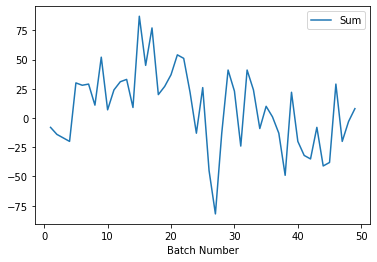

In [11]:
df.plot('Batch Number','Sum')